In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

In [59]:
data_pandas = pd.read_csv("/home/kiro04/Documents/robot_ws/i_robot_ws/data/diabetes.csv")
display(data_pandas)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(data_pandas.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


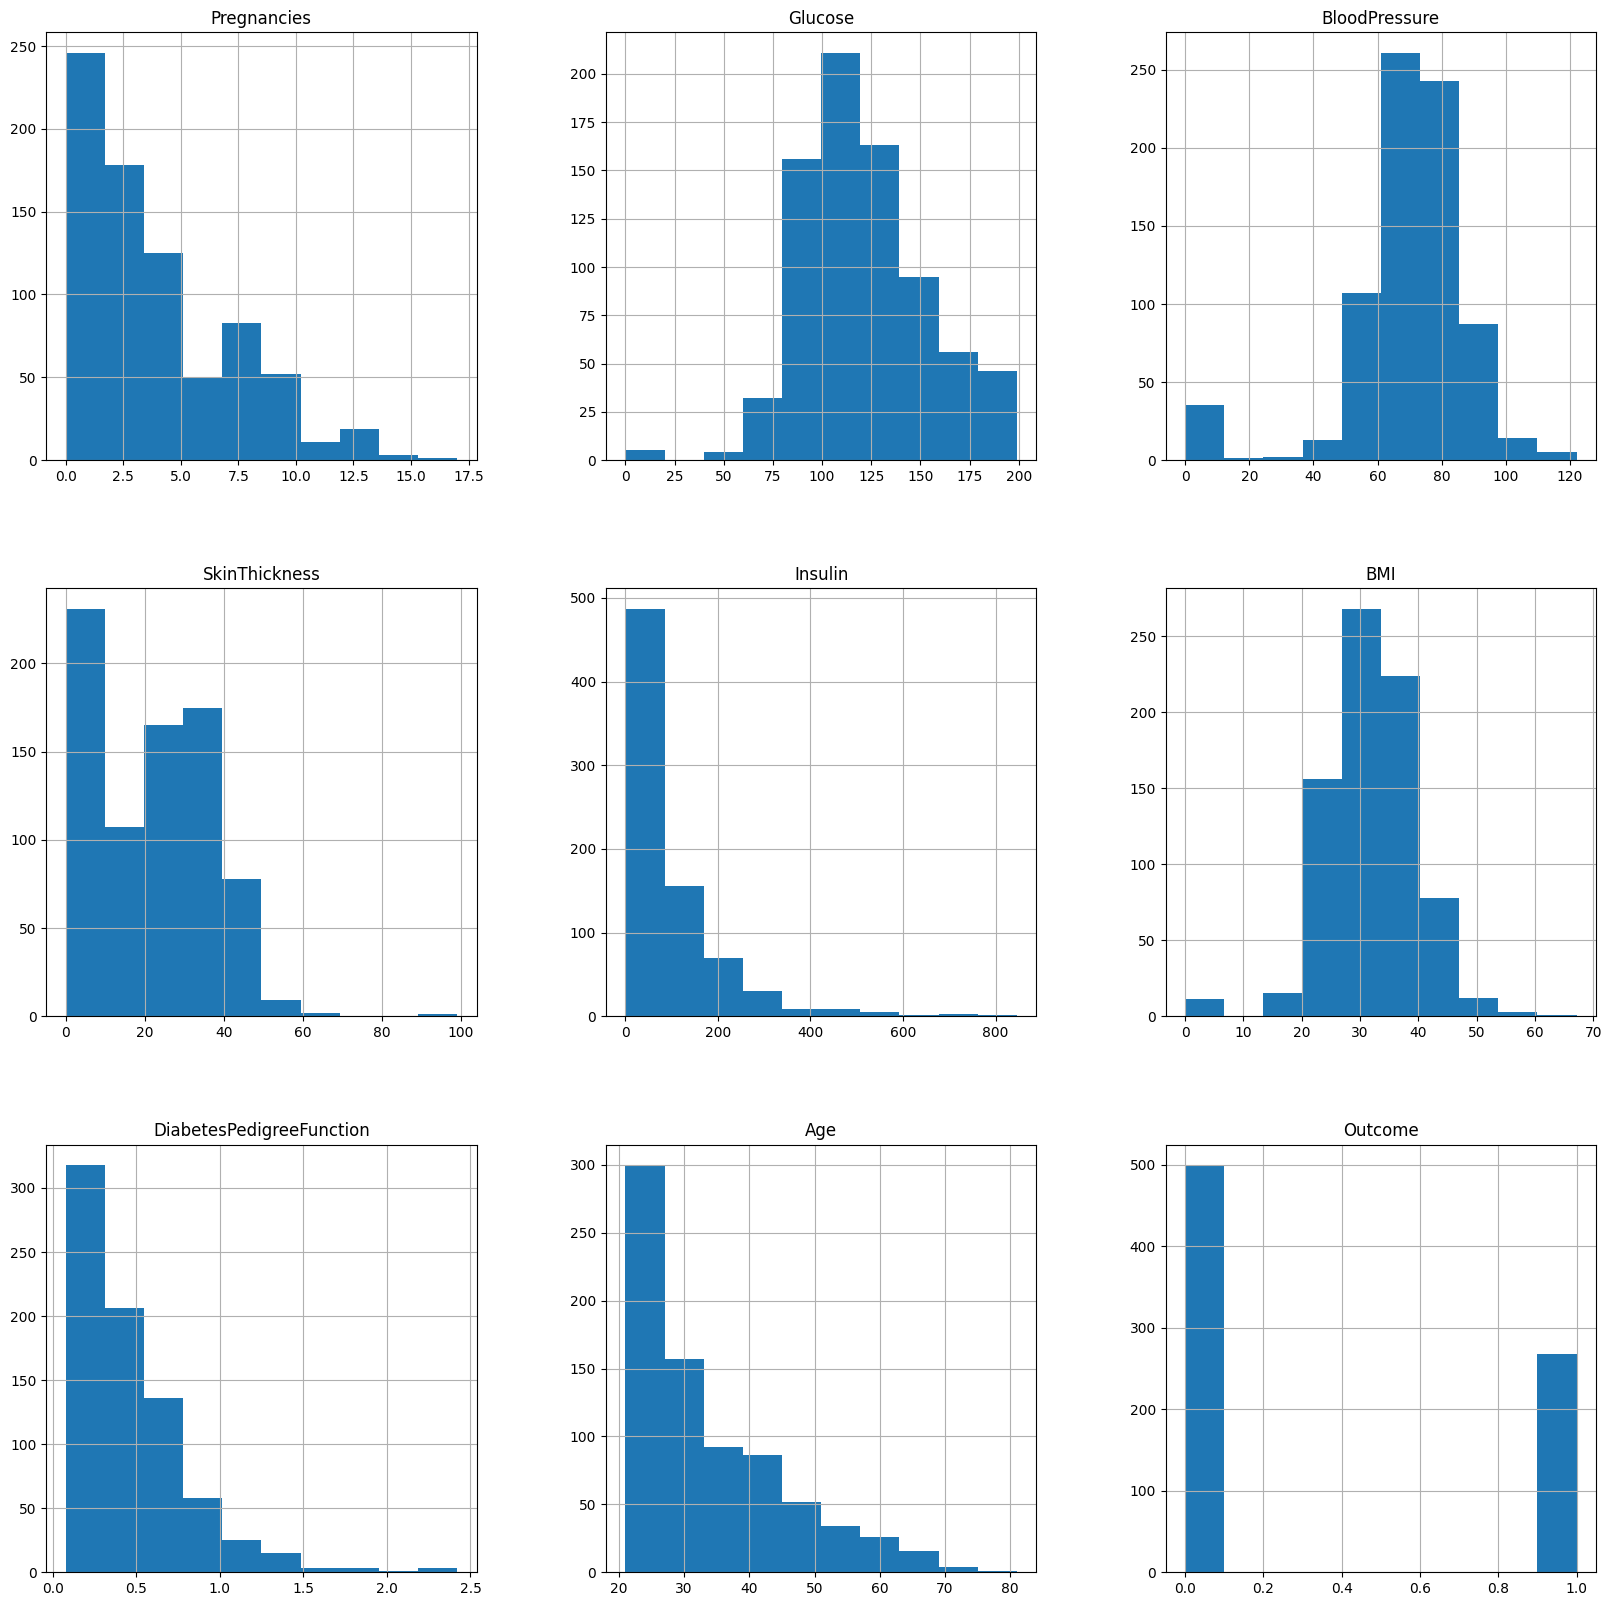

In [ ]:
p = data_pandas.hist(figsize = (20,20))

<Axes: >

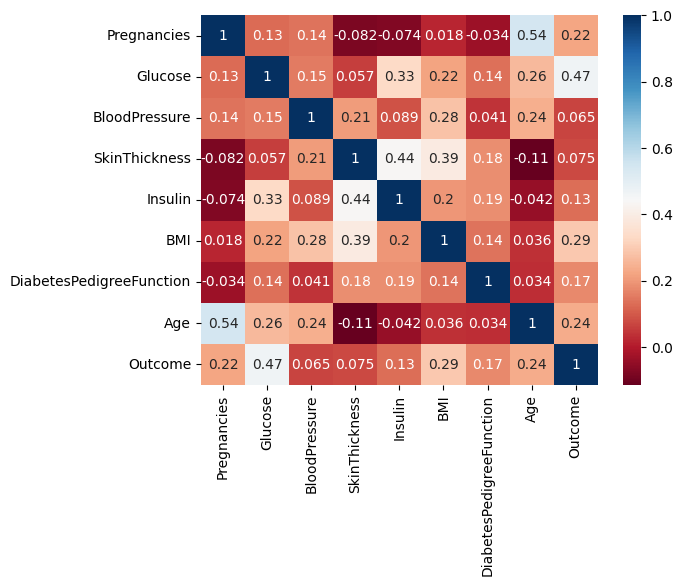

In [ ]:
sns.heatmap(data_pandas.corr(), annot=True,cmap ='RdBu')

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_pandas.loc[:, data_pandas.columns!='Outcome'] = min_max_scaler.fit_transform(data_pandas.loc[:, data_pandas.columns!='Outcome'])
print(data_pandas)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [ ]:
from sklearn.model_selection import train_test_split
X = data_pandas.loc[:, data_pandas.columns != 'Outcome']
Y = data_pandas.loc[:, data_pandas.columns == 'Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)
    
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

print(np.max(train_scores))
print(np.max(test_scores))

/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expe

1.0
0.8095238095238095


/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expe

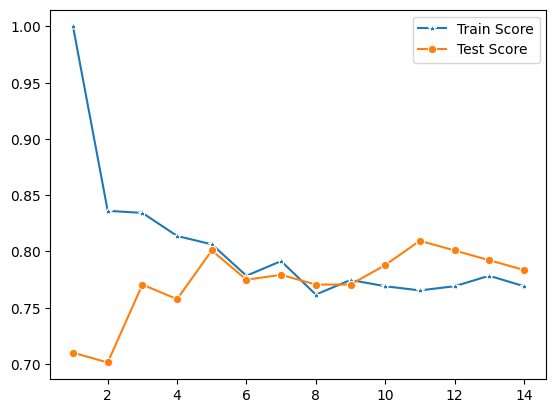

In [ ]:
plt.figure()
sns.lineplot(x=range(1,15), y=train_scores, marker='*',label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o',label='Test Score')
plt.show()

In [ ]:
## 데이터 넣고 테스트 해보기
knn = KNeighborsClassifier(5)
knn.fit(X_train, Y_train)

x_test = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# 정답은 1 입니다.
y_predict = knn.predict(x_test)
print(y_predict)

[1]


/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/dsparch/KIRO/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


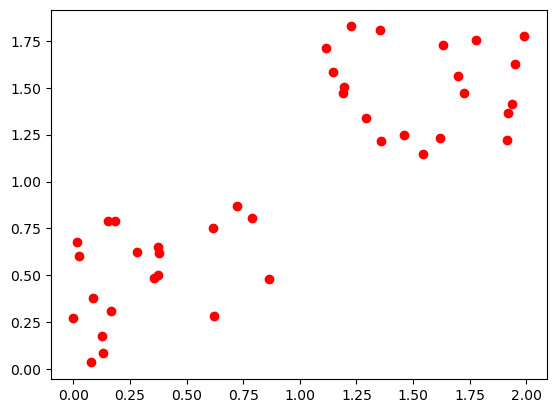

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rng =np.random.RandomState(1)
def generate_random_points(size=10,low=0,high=1):
    return(high - low) * rng.random_sample((size,2))+low

c1  = generate_random_points(20,0,0.9)
c2  = generate_random_points(20,1.1,2)
X= np.vstack([c1,c2])
plt.plot(*X.T,"ro")

/home/kiro04/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


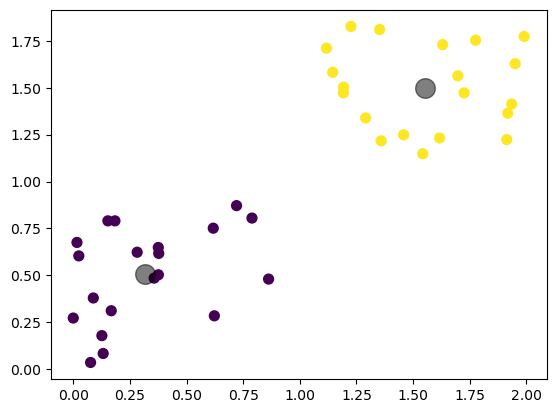

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1],c="black", s=200, alpha=0.5)

/home/kiro04/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


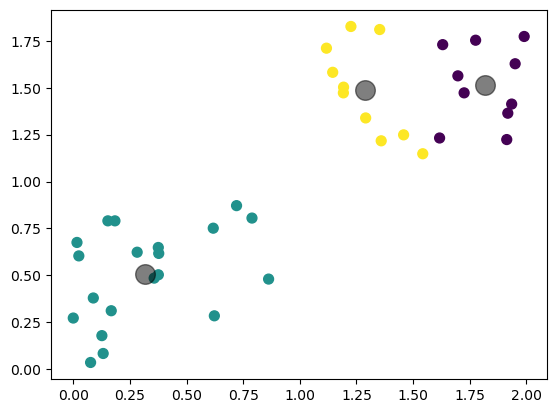

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

rng =np.random.RandomState(1)
def generate_random_points(size=10,low=0,high=1):
    return(high - low) * rng.random_sample((size,2))+low
X=np.vstack([c1,c2])

c1  = generate_random_points(20,0,0.9)
c2  = generate_random_points(20,1.1,2)
X= np.vstack([c1,c2])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0],X[:, 1], c=y_kmeans, s=50)

centers= kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:, 1], c="black",s=200, alpha = 0.5)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']

data = pd.DataFrame(iris.data)
data.columns=["Sepal length",'Sepal width','Petal length','Petal width']

display(labels)
display(data)

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
feature = data[['Sepal length','Sepal width']]
anser = labels[['labels']]

display(feature)

feature = feature.to_numpy()
anser = anser.to_numpy()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


(150, 2)
(2, 150)


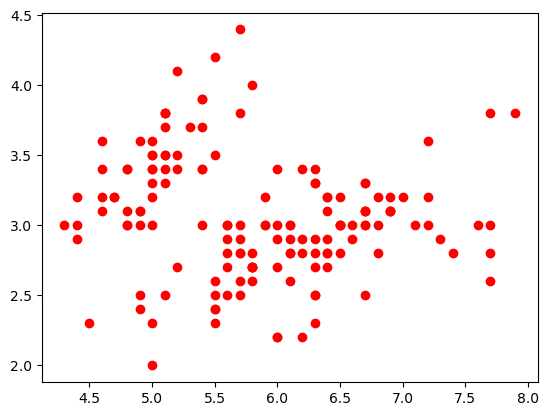

In [56]:
print(feature.shape)
X= feature.T
print(X.shape)
plt.plot(*X,"ro")

/home/kiro04/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


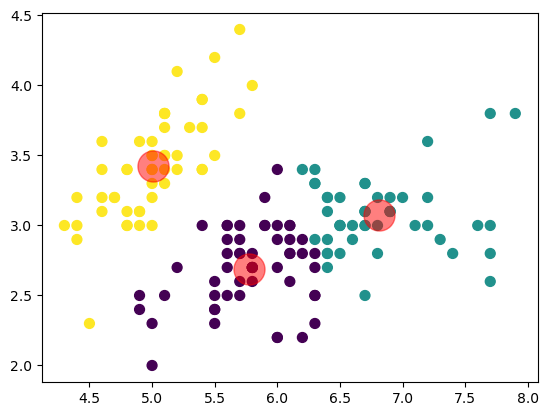

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X.T)

y_kmeans = kmeans.predict(X.T)

plt.scatter(X[0, :],X[1, :],c=y_kmeans, s=50)
centers= kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:, 1], c="r",s=500, alpha = 0.5)